1) Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [38]:
# first some housekeeping

# import librariries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [39]:
# import the data as a pandas dataframe using the index field in the file as the index for the dataframe
bank_df = pd.read_csv('bank_data.csv', index_col=0)

In [40]:
# for our numerical values, we can use the describe method for some basic statistics
bank_df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


In [41]:
bank_df.gender.value_counts()

MALE      300
FEMALE    300
Name: gender, dtype: int64

In [42]:
# we can force the describe method to include non numberical values with the syntax below.
# here we can see counts and frequencies for the categorical variables

# note that many of the attributes available for the numerical values are not available for the categorical variables and
# visa versa
print 'Distribution of all attributes \n'
print bank_df.describe(include='all'),  '\n'

# alternatively, we can do a count of the distribution of each categorical variable using the value_counts() method
print 'Counts of categorical attributes\n'
print bank_df.gender.value_counts(), '\n'
print bank_df.region.value_counts(), '\n'
print bank_df.married.value_counts(), '\n'
print bank_df.car.value_counts(), '\n'
print bank_df.savings_acct.value_counts(), '\n'
print bank_df.current_acct.value_counts(), '\n'
print bank_df.gender.value_counts(), '\n'
print bank_df.pep.value_counts()

Distribution of all attributes 

               age        income    children gender      region married  car  \
count   600.000000    600.000000  600.000000    600         600     600  600   
unique         NaN           NaN         NaN      2           4       2    2   
top            NaN           NaN         NaN   MALE  INNER_CITY     YES   NO   
freq           NaN           NaN         NaN    300         269     396  304   
mean     42.395000  27524.031217    1.011667    NaN         NaN     NaN  NaN   
std      14.424947  12899.468246    1.056752    NaN         NaN     NaN  NaN   
min      18.000000   5014.210000    0.000000    NaN         NaN     NaN  NaN   
25%      30.000000  17264.500000    0.000000    NaN         NaN     NaN  NaN   
50%      42.000000  24925.300000    1.000000    NaN         NaN     NaN  NaN   
75%      55.250000  36172.675000    2.000000    NaN         NaN     NaN  NaN   
max      67.000000  63130.100000    3.000000    NaN         NaN     NaN  NaN   

      

In [43]:
pd.value_counts(bank_df.pep)

NO     326
YES    274
Name: pep, dtype: int64

2) Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [44]:
# one way to compare and contrast different subsets of a categorical value is to use the groupby method of the dataframe.
print 'Distribution of numerical attributes \n'
print bank_df.groupby('pep').describe(),  '\n'

# similarly, we can evaluate the distribution of the categorical attributes based on whether they bout the PEP product
# couting the ages in each group is arbitrary -- we just need to count one attribute
print 'Counts of categorical attributes\n'
print bank_df.groupby(['pep','gender']).age.count(), '\n'
print bank_df.groupby(['pep','region']).age.count(), '\n'
print bank_df.groupby(['pep','married']).age.count(), '\n'
print bank_df.groupby(['pep','car']).age.count(), '\n'
print bank_df.groupby(['pep','savings_acct']).age.count(), '\n'
print bank_df.groupby(['pep','current_acct']).age.count(), '\n'
print bank_df.groupby(['pep','mortgage']).age.count

'''
Some observations about the differnces between these segments of customers
- customers who purchase the PEP product are older and better off financially than those that do not
- having a current account or a savings account at the bank does not appear to be an idicator of whether the PEP
  product is purchased
'''


Distribution of numerical attributes 

                  age    children        income
pep                                            
NO  count  326.000000  326.000000    326.000000
    mean    40.098160    1.067485  24900.953374
    std     14.123506    1.195524  11661.123422
    min     18.000000    0.000000   5014.210000
    25%     27.000000    0.000000  15366.475000
    50%     40.000000    0.000000  23105.000000
    75%     51.000000    2.000000  31210.900000
    max     67.000000    3.000000  61554.600000
YES count  274.000000  274.000000    274.000000
    mean    45.127737    0.945255  30644.919453
    std     14.327991    0.860571  13609.613043
    min     18.000000    0.000000   7756.360000
    25%     34.000000    0.000000  19639.475000
    50%     45.000000    1.000000  28080.050000
    75%     58.000000    1.000000  38458.350000
    max     67.000000    3.000000  63130.100000 

Counts of categorical attributes

pep  gender
NO   FEMALE    170
     MALE      156
YES  FEMALE

'\nSome observations about the differnces between these segments of customers\n- customers who purchase the PEP product are older and better off financially than those that do not\n- having a current account or a savings account at the bank does not appear to be an idicator of whether the PEP\n  product is purchased\n'

3) Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

In [45]:
age_z = (bank_df.age - bank_df.age.mean()) / bank_df.age.std()
print age_z.head()


id
ID12101    0.388563
ID12102   -0.166032
ID12103    0.596536
ID12104   -1.344546
ID12105    1.012482
Name: age, dtype: float64


4) Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

In [46]:
age_bins = pd.qcut(bank_df.age,3, labels=['young','mid-age','old'], retbins=True) 
print age_bins

(id
ID12101    mid-age
ID12102    mid-age
ID12103        old
ID12104      young
ID12105        old
ID12106        old
ID12107      young
ID12108        old
ID12109    mid-age
ID12110        old
ID12111        old
ID12112        old
ID12113    mid-age
ID12114        old
ID12115    mid-age
ID12116    mid-age
ID12117    mid-age
ID12118    mid-age
ID12119        old
ID12120      young
ID12121        old
ID12122        old
ID12123        old
ID12124      young
ID12125      young
ID12126        old
ID12127    mid-age
ID12128    mid-age
ID12129    mid-age
ID12130        old
            ...   
ID12671    mid-age
ID12672    mid-age
ID12673      young
ID12674    mid-age
ID12675    mid-age
ID12676    mid-age
ID12677      young
ID12678        old
ID12679      young
ID12680    mid-age
ID12681        old
ID12682      young
ID12683    mid-age
ID12684    mid-age
ID12685      young
ID12686      young
ID12687      young
ID12688    mid-age
ID12689        old
ID12690      young
ID12691      young
ID12692 

5) Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

In [47]:
bank_df.income = (bank_df.income - bank_df.income.min()) / (bank_df.income.max()-bank_df.income.min())
bank_df.age = (bank_df.age - bank_df.age.min()) / (bank_df.age.max()-bank_df.age.min())
bank_df.children = (bank_df.children - bank_df.children.min()) / (bank_df.children.max()-bank_df.children.min())

6) Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submitit along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [48]:
bank_df_standard = pd.get_dummies(bank_df)

# save the output
bank_df_standard.to_csv('bank_numeric.csv', flot_format='%1.2f')

7) Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy].

In [49]:
# because the customer ID column is already our index, we don't need to first remove this column from the dataframe
print bank_df_standard.corr()

'''
Some observations on the correlations
- high positive correlation between income and age
- living in a rural region has the largest negative correlation among all the regions with being married
'''



                        age    income  children  gender_FEMALE  gender_MALE  \
age                1.000000  0.752726  0.023572       0.090081    -0.090081   
income             0.752726  1.000000  0.036761       0.023845    -0.023845   
children           0.023572  0.036761  1.000000       0.014206    -0.014206   
gender_FEMALE      0.090081  0.023845  0.014206       1.000000    -1.000000   
gender_MALE       -0.090081 -0.023845 -0.014206      -1.000000     1.000000   
region_INNER_CITY -0.025171 -0.047564 -0.051222      -0.023459     0.023459   
region_RURAL       0.018635  0.084776  0.089902      -0.009092     0.009092   
region_SUBURBAN    0.031345  0.029824 -0.014122      -0.010951     0.010951   
region_TOWN       -0.008510 -0.036431 -0.007033       0.040472    -0.040472   
married_NO        -0.010394  0.008386  0.048716       0.021110    -0.021110   
married_YES        0.010394 -0.008386 -0.048716      -0.021110     0.021110   
car_NO            -0.077733 -0.081556 -0.036455     

'\nSome observations on the correlations\n- high positive correlation between income and age\n- living in a rural region has the largest negative correlation among all the regions with being married\n'

8) Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

'\nYes, these two attributes seem positively correlated\n'

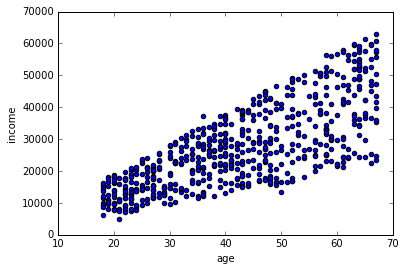

In [50]:
# these two attributes are normalized in our current dataframe so let's create a new one from the raw data
new_bank_df = pd.read_csv('bank_data.csv', index_col=0)

# now we can plot the attributes
new_bank_df.plot(x='age',y='income',kind='scatter')

'''
Yes, these two attributes seem positively correlated
'''

9) Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

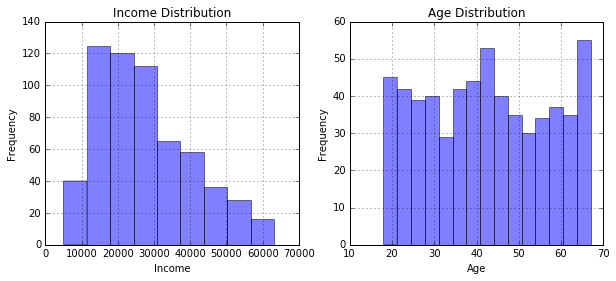

In [51]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Income')
ax1.set_ylabel('Count')
ax1.set_title('Income Distribution')
new_bank_df.income.plot(kind='hist', grid=True, bins=9, alpha=0.5)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age Distribution')
new_bank_df.age.plot(kind='hist',grid=True, bins=15, alpha=0.5)

10) Using a bargraph, plot the distribution of the values of the region attribute.

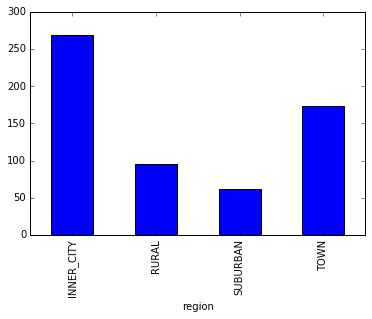

In [52]:
# first create a variable to hold the counts of the regions
regions = bank_df.groupby('region').age.count()

# then plot the values
plt.show(regions.plot(kind='bar'))

11) Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

pep          NO  YES
region              
INNER_CITY  146  123
RURAL        50   46
SUBURBAN     28   34
TOWN        102   71


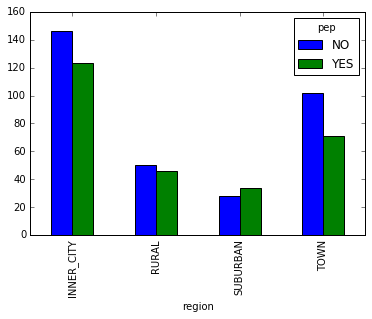

In [53]:
ct = pd.crosstab(new_bank_df.region, new_bank_df.pep)
print ct

plt.show(ct.plot(kind='bar'))